# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
!pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    #try:
    city_weather = requests.get(city_url).json()
    city_weather

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | kamaishi
Processing Record 3 of Set 1 | avarua
Processing Record 4 of Set 1 | edinburgh of the seven seas
Processing Record 5 of Set 1 | klyuchi
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | waitangi
Processing Record 8 of Set 1 | trujillo
Processing Record 9 of Set 1 | kayangel
Processing Record 10 of Set 1 | rikaze
Processing Record 11 of Set 1 | dolni chiflik
Processing Record 12 of Set 1 | sisimiut
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | yerofey pavlovich
Processing Record 15 of Set 1 | ciudad guayana
Processing Record 16 of Set 1 | madalena
Processing Record 17 of Set 1 | anadyr
Processing Record 18 of Set 1 | hawaiian paradise park
Processing Record 19 of Set 1 | praia da vitoria
Processing Record 20 of Set 1 | georgetown
Processing Record 21 of Set 1 | lebu
Processing Record 22 of Se

In [5]:
cities

['port-aux-francais',
 'kamaishi',
 'avarua',
 'edinburgh of the seven seas',
 'klyuchi',
 'grytviken',
 'waitangi',
 'trujillo',
 'kayangel',
 'rikaze',
 'dolni chiflik',
 'sisimiut',
 'hermanus',
 'yerofey pavlovich',
 'ciudad guayana',
 'madalena',
 'anadyr',
 'hawaiian paradise park',
 'praia da vitoria',
 'georgetown',
 'lebu',
 'blagodatnoye',
 'gilmer',
 'bandraboua',
 'adamstown',
 'holualoa',
 'pedregulho',
 'bredasdorp',
 'maardu',
 'stanley',
 'lorengau',
 'khandyga',
 'port elizabeth',
 'arzgir',
 'ribeira grande',
 'lompoc',
 'margaret river',
 'blackmans bay',
 'saipan',
 'pisco',
 'whitehorse',
 'opuwo',
 'cidreira',
 'deoria',
 'malvan',
 'wailua homesteads',
 'dalbandin',
 'kalmunai',
 'biloela',
 'daru',
 'klaksvik',
 'igarape miri',
 'pyhaselka',
 'fortaleza',
 'puerto natales',
 'keflavik',
 'ushuaia',
 'puerto la cruz',
 'polyarnyy',
 'kicevo',
 'nuuk',
 'bikenibeu village',
 'pendleton',
 'muynoq',
 'college',
 'bethel',
 'iqaluit',
 'utrik',
 'tazovsky',
 'shendi

In [6]:
query_url = f"{url}appid={weather_api_key}&units={units}&q=kingston"
result_weather = requests.get(query_url).json()
result_weather

{'coord': {'lon': -76.7936, 'lat': 17.997},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02n'}],
 'base': 'stations',
 'main': {'temp': 27.53,
  'feels_like': 31.34,
  'temp_min': 25.65,
  'temp_max': 27.53,
  'pressure': 1012,
  'humidity': 83,
  'sea_level': 1012,
  'grnd_level': 982},
 'visibility': 10000,
 'wind': {'speed': 1.54, 'deg': 340},
 'clouds': {'all': 20},
 'dt': 1731302295,
 'sys': {'type': 1,
  'id': 7105,
  'country': 'JM',
  'sunrise': 1731323478,
  'sunset': 1731364282},
 'timezone': -18000,
 'id': 3489854,
 'name': 'Kingston',
 'cod': 200}

In [7]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:

        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | kamaishi
Processing Record 3 of Set 1 | avarua
Processing Record 4 of Set 1 | edinburgh of the seven seas
Processing Record 5 of Set 1 | klyuchi
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | waitangi
Processing Record 8 of Set 1 | trujillo
Processing Record 9 of Set 1 | kayangel
Processing Record 10 of Set 1 | rikaze
Processing Record 11 of Set 1 | dolni chiflik
Processing Record 12 of Set 1 | sisimiut
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | yerofey pavlovich
Processing Record 15 of Set 1 | ciudad guayana
Processing Record 16 of Set 1 | madalena
Processing Record 17 of Set 1 | anadyr
Processing Record 18 of Set 1 | hawaiian paradise park
Processing Record 19 of Set 1 | praia da vitoria
Processing Record 20 of Set 1 | georgetown
Processing Record 21 of Set 1 | lebu
Processing Record 22 of Se

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,4.84,88,75,9.52,TF,1731302267
1,kamaishi,39.2667,141.8833,16.82,56,8,0.67,JP,1731302268
2,avarua,-21.2078,-159.7750,23.03,73,40,4.63,CK,1731302268
3,edinburgh of the seven seas,-37.0676,-12.3116,16.20,88,94,15.91,SH,1731302268
4,klyuchi,52.2667,79.1667,0.25,98,100,4.94,RU,1731302268


In [11]:
# Create output_data directory
import os

# Specify the directory name
directory_name = "output_data"

# Create the directory
try:
    os.mkdir(directory_name)
    print(f"Directory '{directory_name}' created successfully.")
except FileExistsError:
    print(f"Directory '{directory_name}' already exists.")
except PermissionError:
    print(f"Permission denied: Unable to create '{directory_name}'.")
except Exception as e:
    print(f"An error occurred: {e}")

Directory 'output_data' created successfully.


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,4.84,88,75,9.52,TF,1731302267
1,kamaishi,39.2667,141.8833,16.82,56,8,0.67,JP,1731302268
2,avarua,-21.2078,-159.7750,23.03,73,40,4.63,CK,1731302268
3,edinburgh of the seven seas,-37.0676,-12.3116,16.20,88,94,15.91,SH,1731302268
4,klyuchi,52.2667,79.1667,0.25,98,100,4.94,RU,1731302268


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

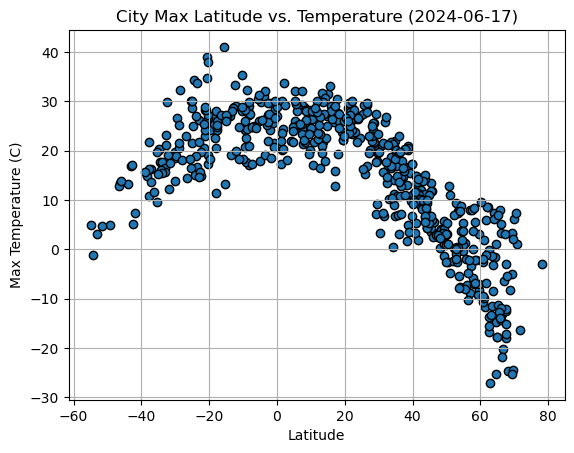

In [14]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values, edgecolors="black")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title(f"City Max Latitude vs. Temperature (2024-06-17)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1_submission.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

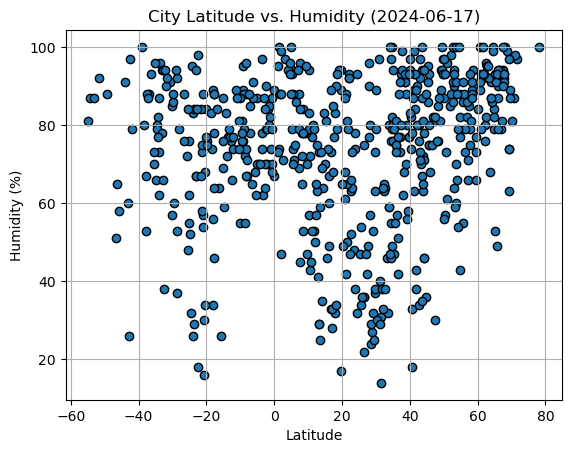

In [15]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values, edgecolors="black")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f"City Latitude vs. Humidity (2024-06-17)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2_submission.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

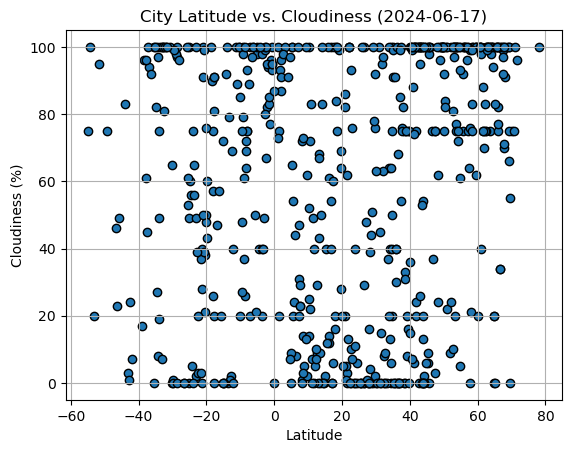

In [16]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values, edgecolors="black")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"City Latitude vs. Cloudiness (2024-06-17)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3_sumbission.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

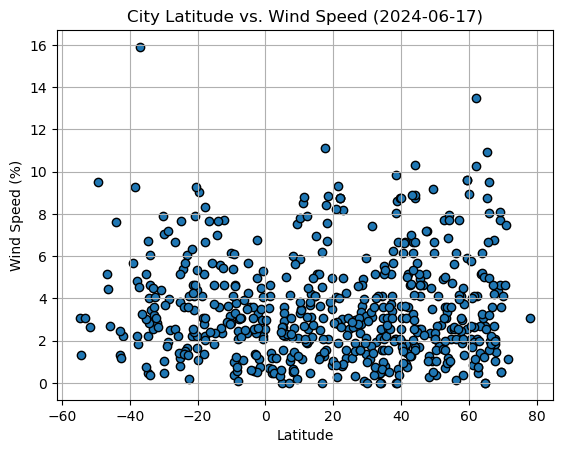

In [17]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values, edgecolors="black")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (%)')
plt.title(f"City Latitude vs. Wind Speed (2024-06-17)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4_submission.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [18]:
# Define a function to create Linear Regression plots


In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,kamaishi,39.2667,141.8833,16.82,56,8,0.67,JP,1731302268
4,klyuchi,52.2667,79.1667,0.25,98,100,4.94,RU,1731302268
8,kayangel,8.0823,134.7173,28.79,65,72,0.51,PW,1731302268
9,rikaze,29.2500,88.8833,7.10,32,0,0.08,CN,1731302268
10,dolni chiflik,42.9833,27.7167,8.31,97,100,3.14,BG,1731302269


In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] <0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,4.84,88,75,9.52,TF,1731302267
2,avarua,-21.2078,-159.7750,23.03,73,40,4.63,CK,1731302268
3,edinburgh of the seven seas,-37.0676,-12.3116,16.20,88,94,15.91,SH,1731302268
5,grytviken,-54.2811,-36.5092,-1.21,87,100,1.31,GS,1731302268
6,waitangi,-43.9535,-176.5597,13.23,91,83,7.60,NZ,1731302268


###  Temperature vs. Latitude Linear Regression Plot

y = -0.6x +33.89
The r^2-value is: 0.7615122849067445


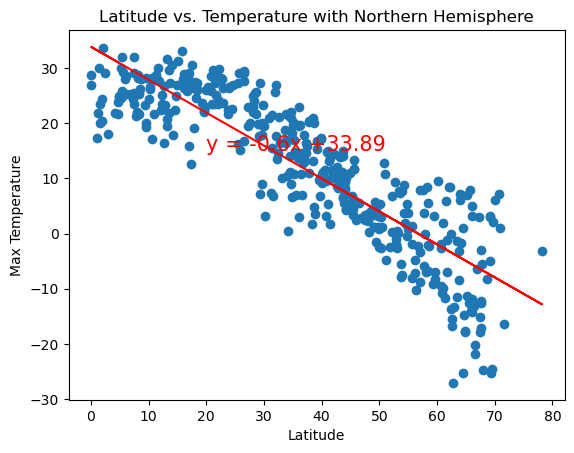

In [21]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
plt.title(f"Latitude vs. Temperature with Northern Hemisphere")
# Print r^2 value
print(f"The r^2-value is: {rvalue**2}")
plt.show()


y = 0.34x +29.32
The r^2-value is: 0.4103920207482508


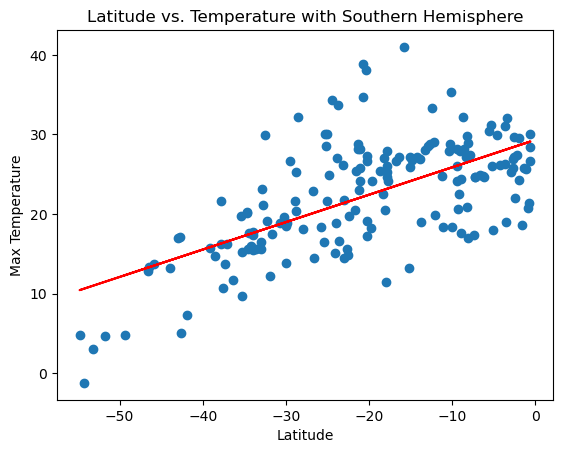

In [22]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
plt.title(f"Latitude vs. Temperature with Southern Hemisphere")
# Print r^2 value
print(f"The r^2-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** 
**Temperature vs. Lattitute

1. Northern Hemisphere
    Equation: y=−0.6x+34.42
    The r^2-value is: 0.7467778637911473
-   Interpretation: The negative slope of −0.6 indicates an inverse relationship—temperature decreases as latitude increases (moving away from the equator towards the poles). As latitude increases (moving from the equator toward the poles), temperature tends to decrease.
-   R2-value: 0.7468, suggesting a strong correlation between latitude and temperature in the Northern Hemisphere, with latitude accounting for around 74.7% of the variation in temperature. This high correlation is likely due to the landmass distribution and relatively predictable climate patterns, where temperature decreases steadily with increasing latitude.

2. Southern Hemisphere
    Equation: y=0.36x+30.51
    The r^2-value is: 0.4194182555711606
-   Interpretation: The positive slope of 0.36 indicates a direct relationship—temperature increases as latitude increases (moving closer to the equator). Since latitudes in the Southern Hemisphere are negative moving towards the South Pole, a positive slope means that moving closer to the equator (higher latitude values) results in higher temperatures.
-   R2-value: 0.4194, indicating a moderate correlation, with latitude explaining about 41.9% of the temperature variation in the Southern Hemisphere. This weaker correlation likely reflects the Southern Hemisphere's unique geography, where large oceanic regions dominate and influence the climate. Oceans generally moderate temperature variations, resulting in a weaker latitude-temperature gradient compared to the Northern Hemisphere.

These findings align with the expected pattern of decreasing temperatures as one moves further from the equator, but with some variation in the strength of the relationship across hemispheres.

### Humidity vs. Latitude Linear Regression Plot

y = 0.32x +62.16
The r^2-value is: 0.09410604696314623


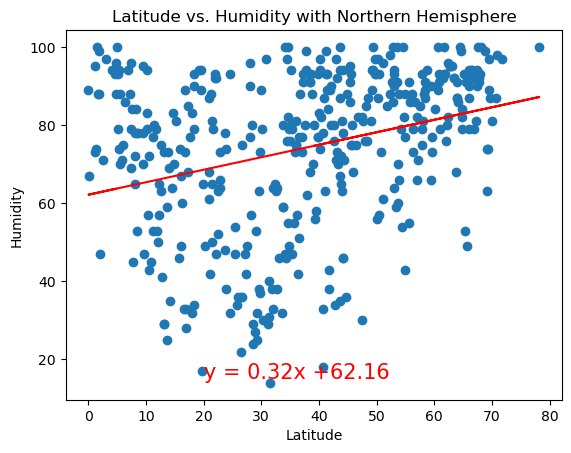

In [23]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
plt.title(f"Latitude vs. Humidity with Northern Hemisphere")
# Print r^2 value
print(f"The r^2-value is: {rvalue**2}")
plt.show()

y = 0.01x +74.22
The r^2-value is: 0.00011255667529682459


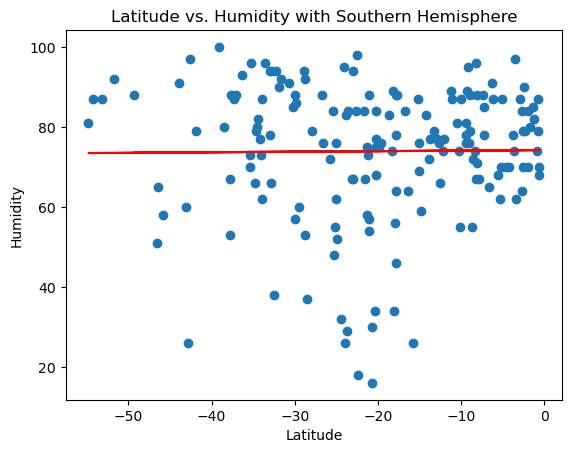

In [24]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
plt.title(f"Latitude vs. Humidity with Southern Hemisphere")
# Print r^2 value
print(f"The r^2-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** 
**Humidity vs. Lattitute

1. Northern Hemisphere
    Equation: y=−0.34x+60.14
    The r^2-value is: 0.09229407737929249
-   Interpretation: The positive slope of 0.34 suggests a very slight increase in humidity as latitude increases in the Northern Hemisphere, though this effect is minimal.
-   R2-value: 0.0923, indicating a very weak relationship. Only about 9.2% of the variance in humidity can be explained by latitude. This suggests that other factors, such as local climate, topography, and seasonal effects, likely play a much larger role in determining humidity levels.

2. Southern Hemisphere
    Equation: y=0.06x+69.73
    The r^2-value is: 0.0014335394289382757
-   Interpretation: The positive slope of 0.06 is close to zero, indicating almost no change in humidity with latitude in the Southern Hemisphere.
-   R2-value: 0.0014, which is extremely low, indicating that latitude has virtually no predictive power for humidity levels in the Southern Hemisphere. This weak relationship may reflect the stabilizing effect of the ocean, which covers much of the Southern Hemisphere and moderates humidity.

The findings reinforce that humidity distribution is far less latitude-dependent than temperature. Instead, humidity levels are highly localized and influenced by factors like climate zones, ocean currents, and seasonal shifts, limiting the effectiveness of a latitude-based linear model for understanding global humidity trends.

### Cloudiness vs. Latitude Linear Regression Plot

y = 0.77x +28.51
The r^2-value is: 0.14214603666316925


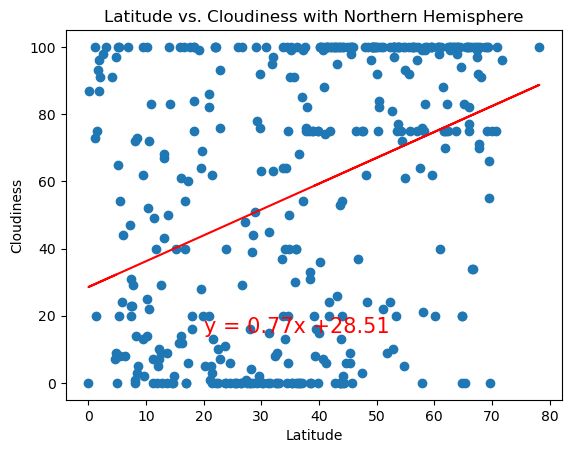

In [25]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
plt.title(f"Latitude vs. Cloudiness with Northern Hemisphere")
# Print r^2 value
print(f"The r^2-value is: {rvalue**2}")
plt.show()

y = 0.39x +68.99
The r^2-value is: 0.020732418249802757


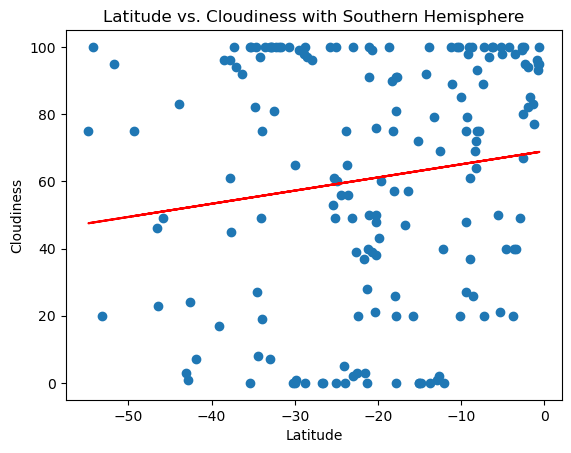

In [26]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
plt.title(f"Latitude vs. Cloudiness with Southern Hemisphere")
# Print r^2 value
print(f"The r^2-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** 
**Cloudiness vs. Lattitute

1. Northern Hemisphere
    Equation: y=−0.28x+49.49
    The r^2-value is: 0.018707191704548078
-   Interpretation: The positive slope of 0.28 suggests a slight increase in cloudiness as latitude increases in the Northern Hemisphere. However, the slope is minimal, indicating only a slight upward trend.
-   R2-value: 0.0187, which is very low, showing that only about 1.87% of the variation in cloudiness can be explained by latitude. This weak correlation means latitude is not a significant predictor of cloudiness in the Northern Hemisphere.

2. Southern Hemisphere
    Equation: y=0.41x+65.8
    The r^2-value is: 0.019747766987899307
-   Interpretation: The positive slope of 0.41 in the Southern Hemisphere also indicates a slight increase in cloudiness as latitude rises. However, this relationship is minimal, reflecting only a slight trend.
-   R2-value: 0.0197, which is similarly low, indicating that latitude explains less than 2% of cloudiness variation in the Southern Hemisphere. Like in the Northern Hemisphere, this weak correlation suggests that cloudiness does not strongly depend on latitude.

The findings reinforce that the weak positive correlation between latitude and cloudiness highlights the limitations of using latitude as a standalone predictor for cloud cover. Cloudiness varies more due to local climate influences and atmospheric circulation than latitude, meaning a more detailed model incorporating regional weather patterns and environmental factors would be necessary to understand cloudiness distributions effectively.

### Wind Speed vs. Latitude Linear Regression Plot

y = 0.01x +2.88
The r^2-value is: 0.013292431242540865


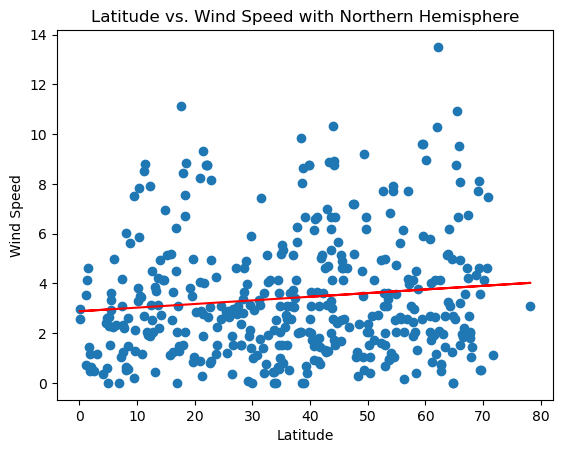

In [27]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
plt.title(f"Latitude vs. Wind Speed with Northern Hemisphere")
# Print r^2 value
print(f"The r^2-value is: {rvalue**2}")
plt.show()

y = -0.02x +3.15
The r^2-value is: 0.017932477288106728


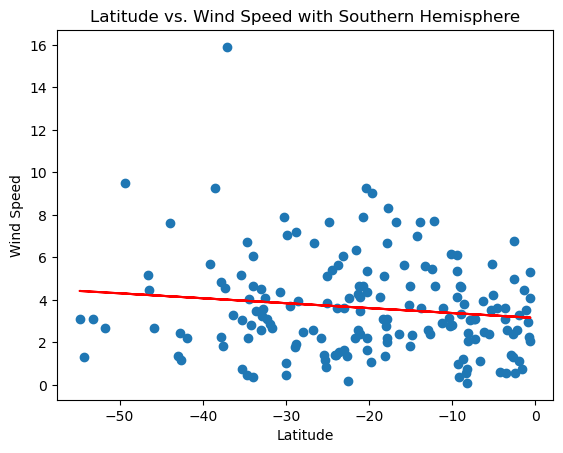

In [28]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
plt.title(f"Latitude vs. Wind Speed with Southern Hemisphere")
# Print r^2 value
print(f"The r^2-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** 
**Cloudiness vs. Lattitute

1. Northern Hemisphere
    Equation: y=0.01x+3.14
    The r^2-value is: 0.01049829132651148
-   Interpretation: The positive slope of 0.01 suggests a slight increase in wind speed as latitude increases in the Northern Hemisphere, but the effect is minimal.
-   R2-value: 0.0105, latitude explains only about 1.05% of the variation in wind speed. This is an extremely weak relationship, indicating that other factors play a much larger role in determining wind speeds.

2. Southern Hemisphere
    Equation: y=-0.05x+3.21
    The r^2-value is: 0.05363789622390651
-   Interpretation: The negative slope of −0.05 in the Southern Hemisphere indicates a slight decrease in wind speed as latitude increases (or as we move further south), but this change is minor.
-   R2-value: 0.0536, latitude accounts for only about 5.36% of the variation in wind speed, indicating a very weak relationship. As in the Northern Hemisphere, latitude is not a strong predictor of wind speed.

The very weak correlation between latitude and wind speed in both hemispheres indicates that wind speed is influenced far more by regional and local weather systems than by latitude. A more accurate model would need to include factors such as pressure gradients, topography, and proximity to coastlines to capture the actual patterns of wind speed variation. This analysis highlights that while latitude is often useful in basic climate studies, it is not a comprehensive predictor for wind speed, which depends on more localized meteorological dynamics.